# S06 T01: Tasca dades, probabilitats i estadístiques
## Luis Pardina - Data Science - 05/Maig/2022

***Exercici 1***: Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vaig a continuar amb la base de dades d'escaladors que vaig utilitzar a l'sprint anterior:

In [3]:
escaladors = pd.read_csv('climber_df.csv')
escaladors

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,66987,ESP,0,194,83,33.0,5,2015-05-01 22:00:00,2017-09-03 22:00:00,27,35,44,49,39.666667,2015,2017
10923,66988,USA,0,183,78,22.0,1,2017-09-03 22:00:00,2017-09-06 22:00:00,2,33,28,33,30.500000,2017,2017
10924,67009,other,0,165,63,41.0,20,2017-09-09 22:00:00,2003-06-19 22:00:00,35,53,46,59,45.800000,2017,2003
10925,67019,NOR,0,172,73,26.0,4,2017-06-14 22:00:00,2017-08-11 22:00:00,7,44,46,46,42.714286,2017,2017


A més de nacionalitat, sexe, alçada pes i edat de l'escalador hi ha aquests altres camps:
- years_cl -> years climbing
- date_first -> date of the first ascension
- date_last -> date of the last ascension
- grades_count -> number of routes done by climber
- grades_first -> grade of the first ascension
- grades_last -> grade of the last ascension
- grades_max -> biggest grade achieved by climber in an ascension
- grades_mean -> average of the grades of the climber in ascensions
- year_first -> year of the first ascension
- year_last -> year of the last ascension

Repaso les característiques del dataset que ja vaig comentar a l'sprint anterior:
- Te prop d'11.000 registres
- No hi ha camps nuls.
- Excepte el pais i els camps *date_first* i *date_last*, són tots camps numèrics.
- Hi ha tres registres on el camp *year_first* té un valor inconsistent (0, 0, 1095).
- A més, només en 192 dels registres hi ha coincidencia entre els valors de *years_cl* (els anys que l'escalador duu fent ascensions) i la diferencia entre *year_last* (any de la darrera escalada) i *year_first* (any de la primera escalada). Aquests dos darrers camps semblen extrets de *date_first* i *date_last*.


Per a l'exercici trec els camps que no son numèrics o que son dates. Comento els resultats més rellevants:
- Obviament el sexe es una variable categorica transposada a numèrica, la moda i mediana 0 i la mitja 0.13 només volen dir que hi ha més homes (0) que dones (1).
- Per a alçada, pes i edat es veu que moda, mediana i mitjana son molt semblants, la qual cosa és característica de les distribucions normals.
- Per a years_cl, ja vam veure a l'histograma que semblava bimodal, i de fet te una moda (17) molt diferent de mediana i mitjana (12), i una desviació estándar molt gran en comparació amb la mitjana. 
- Per a grades_count es veu l'efecte dels outliers en l'enormes diferencies entre moda (1), mediana (28) i mitjana (79). Penso que s'estan barrejant en aquesta base de dades grups d'escaladors que tenen moltes diferencies en anys d'experiència i pràctica de l'esport, professionals i amateurs.

In [4]:
escaladors.drop(['user_id','country','date_first', 'date_last', 'year_first', 'year_last'], axis=1, inplace=True) 

In [5]:
a = [escaladors.median(), escaladors.std(), escaladors.mean()]
round(pd.concat(a, axis=1, keys = ['Median', 'Std', 'Mean']),2)

,Median,Std,Mean
sex,0.00,0.33,0.13
height,177.00,8.51,176.15
weight,68.00,9.68,67.61
age,33.00,7.59,33.33
years_cl,12.00,6.11,12.67
grades_count,28.00,141.41,79.79
grades_first,46.00,9.48,45.65
grades_last,48.00,9.42,46.98
grades_max,55.00,9.68,53.76
grades_mean,45.15,7.89,45.51


In [6]:
escaladors.mode()

,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
0,0,180,68,33.0,17,1,49,49,62,36.0


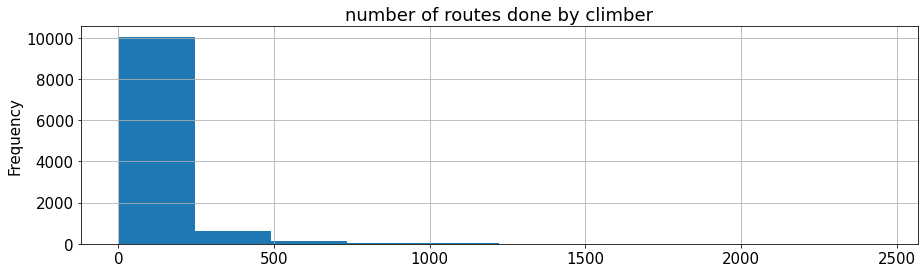

In [7]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (15, 4)})
escaladors.grades_count.plot(kind='hist',title = 'number of routes done by climber', grid='True');

***Exercici 2***: Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

A continuació poso tres exemples, respecte de l'atribut grades_mean (mitjana del grau de dificultat de les ascensions fetes per l'escalador) de correlació practicament nul.la (amb l'edat), una correlació una mica més gran (amb els anys escalant) i una correlació molt forta (amb el grau màxim asolit). Faig una representació gràfica d'aquestes tres correlacions:

In [8]:
round(escaladors['age'].corr(escaladors['grades_mean']), 3)

-0.07

In [9]:
round(escaladors['years_cl'].corr(escaladors['grades_mean']), 3)

0.371

In [10]:
round(escaladors['grades_max'].corr(escaladors['grades_mean']), 3)

0.867

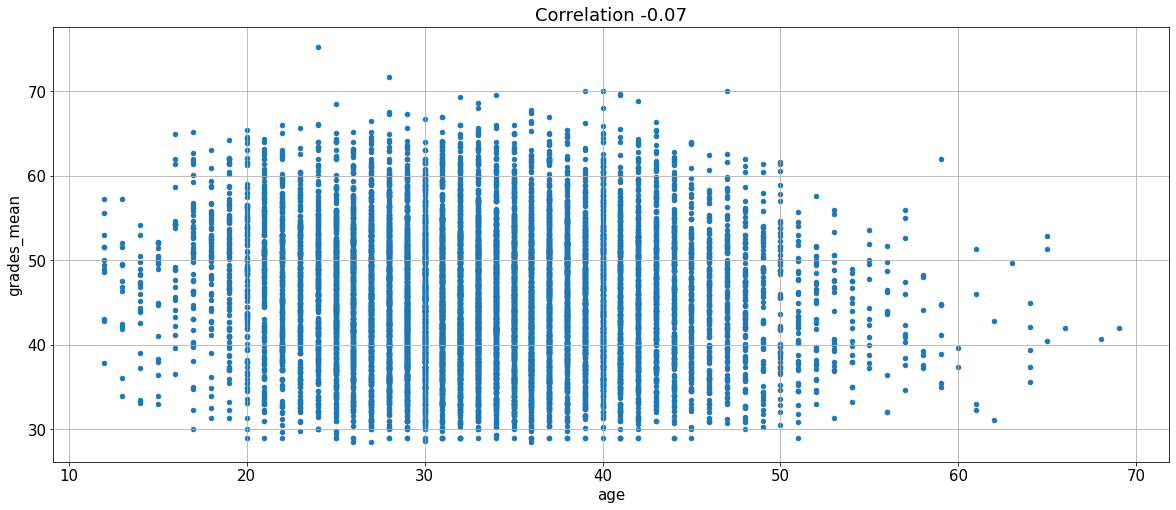

In [23]:
escaladors.plot(kind='scatter',  x='age', y='grades_mean', title = 'Correlation -0.07', grid='True');

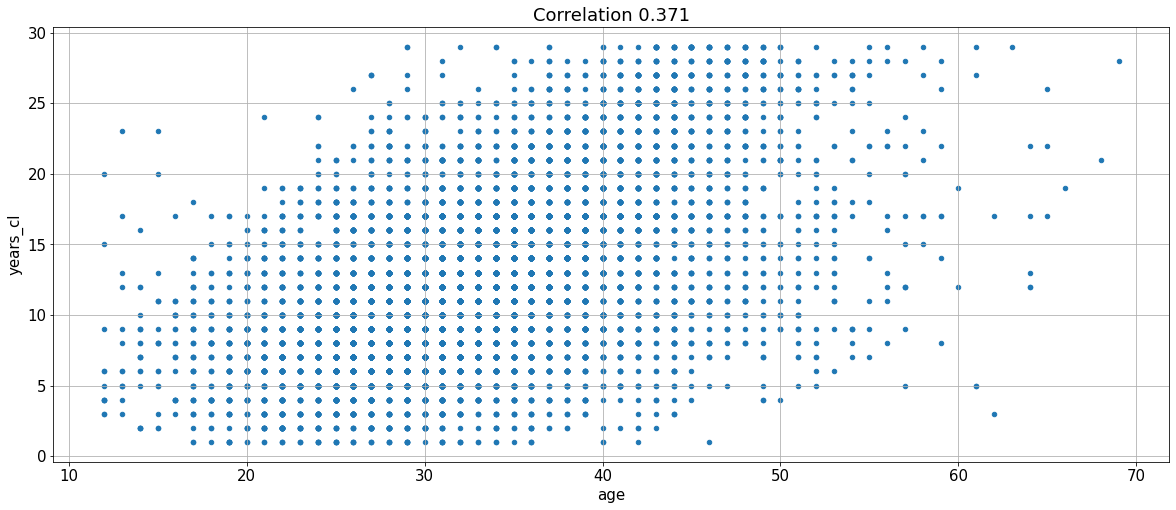

In [24]:
escaladors.plot(kind='scatter',  x='age', y='years_cl', title = 'Correlation 0.371', grid='True');

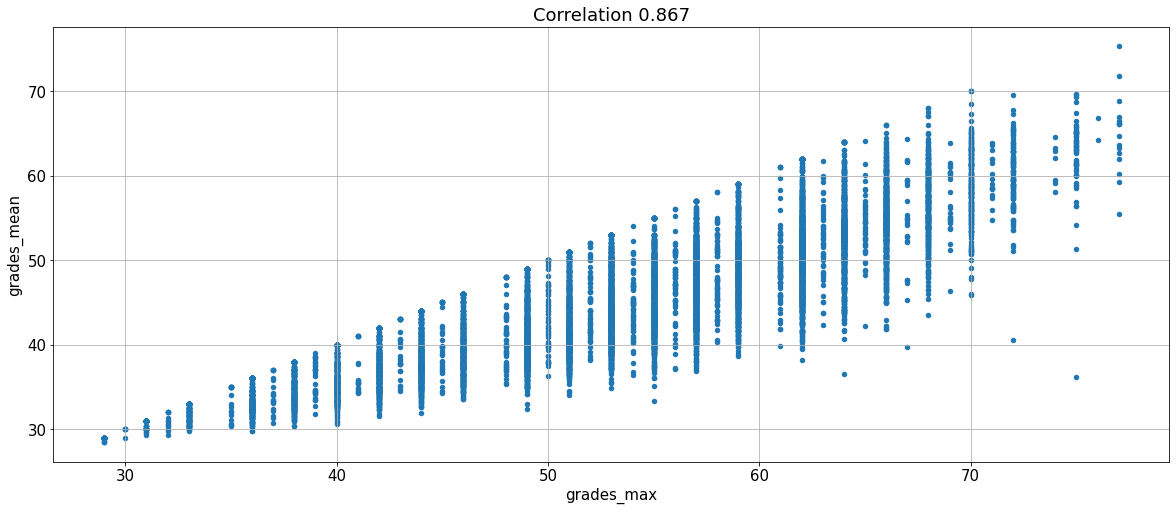

In [25]:
escaladors.plot(kind='scatter',  x='grades_max', y='grades_mean', title = 'Correlation 0.867', grid='True');

***Exercici 3***: Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

Per un costat la matriu de totes les correlacions la trec aplicant el mètode .corr() al dataframe, i el heatmap amb l'ajuda de Seaborn.

Les correlacions negatives entre sexe i pes o sexe i alçada només indiquen que els homes (0) són més alts o mes grossos que les dones a aquest dataframe.

Existeix una certa correlació entre l'edat i els anys que duu practicant l'esport, la qual cosa no es sorprenent.

Les correlacions més fortes es produeixen entre els diferents atributs de grade, excepte el count.

In [40]:
escaladors.corr()

,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
sex,1.000000,-0.518464,-0.538760,-0.034270,-0.069058,-0.031869,-0.093250,-0.095457,-0.116775,-0.118566
height,-0.518464,1.000000,0.748634,0.096081,0.030715,0.007971,-0.017679,-0.032642,-0.023969,-0.022069
weight,-0.538760,0.748634,1.000000,0.226210,0.057742,-0.002595,-0.096097,-0.130634,-0.127179,-0.124287
age,-0.034270,0.096081,0.226210,1.000000,0.525413,0.099123,0.001126,-0.106154,-0.074483,-0.069768
years_cl,-0.069058,0.030715,0.057742,0.525413,1.000000,0.112849,0.391704,0.273530,0.326440,0.370702
grades_count,-0.031869,0.007971,-0.002595,0.099123,0.112849,1.000000,0.103870,0.182213,0.380520,0.141299
grades_first,-0.093250,-0.017679,-0.096097,0.001126,0.391704,0.103870,1.000000,0.665414,0.729331,0.848214
grades_last,-0.095457,-0.032642,-0.130634,-0.106154,0.273530,0.182213,0.665414,1.000000,0.799406,0.842891
grades_max,-0.116775,-0.023969,-0.127179,-0.074483,0.326440,0.380520,0.729331,0.799406,1.000000,0.866650
grades_mean,-0.118566,-0.022069,-0.124287,-0.069768,0.370702,0.141299,0.848214,0.842891,0.866650,1.000000


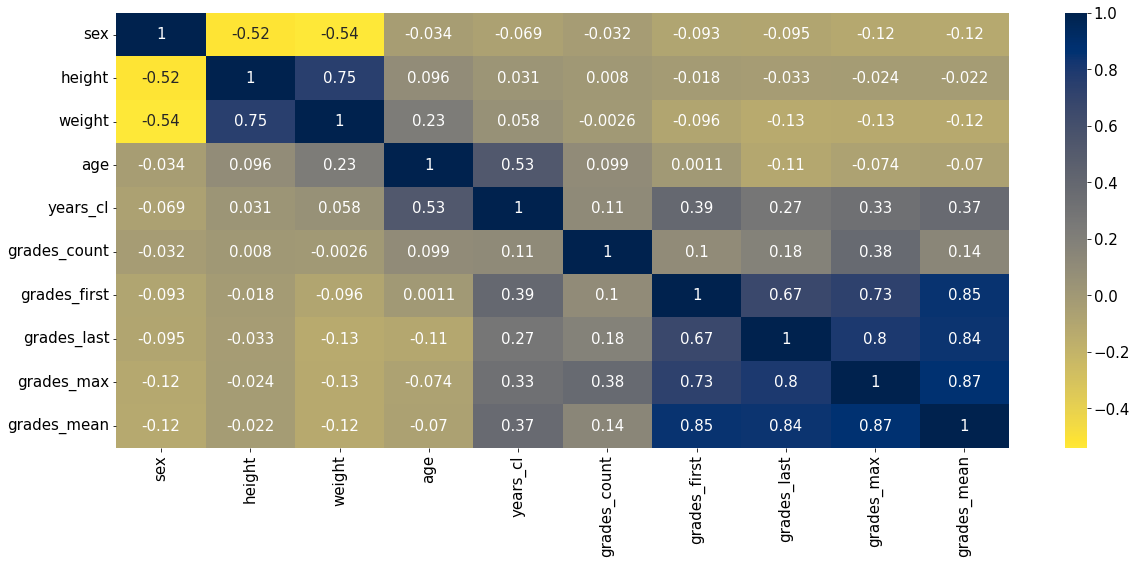

In [32]:
sns.heatmap(escaladors.corr(), annot=True, cmap='cividis_r');

***Exercici 4***: Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

Les mitjanes geomètrica i haarmònica les calculo amb el mòdul statistics. Selecciono l'atribut grades_count que te una dispersió molt gran (He vist abans: Moda =1, mediana = 28, mitjana = 141.4)

In [39]:
import statistics

In [38]:
escaladors.grades_count.describe()

count    10927.000000
mean        79.794546
std        141.411297
min          1.000000
25%          8.000000
50%         28.000000
75%         90.000000
max       2445.000000
Name: grades_count, dtype: float64

La mitjana geomètrica ens dóna una manera de trobar un valor entre valors de magnituds molt diferents. En el cas de grades_count s'aproxima més a la mitjana (el mínim i la moda es 1, el màxim 2445).

Pel que fa a la mitjana harmònica, atès  tendeix fortament cap als elements mínims de la llista, tendeix (en comparació amb la mitjana aritmètica) a mitigar l'impacte dels valors atípics grans. Per això en el cas de grades_count s'aproxima més a la moda!

In [44]:
round(statistics.geometric_mean(escaladors['grades_count']), 2)

25.36

In [45]:
round(statistics.harmonic_mean(escaladors['grades_count']), 2)

7.16